In [41]:
def line(size: int = 15):
    print("-"*size)
    

## `Univariate data analyses - NHANES case study`

Here we will demonstrate how to use Python and [Pandas](https://pandas.pydata.org/) to perform some basic analyses with univariate data, using the 2015-2016 wave of the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) study to illustrate the techniques

The following import statements make the libraries that we will need available.  Note that in a Jupyter notebook, you should generally use the `%matplotlib inline` directive, which would not be used when running a script outside of the Jupyter environment.


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

da = pd.read_csv('data/nhanes-2015-2016.csv')

### `Frequency tables`

The [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable.  Below we show the frequency distribution of the [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2) variable, which is a variable that reflects a person's level of educational attainment.  The `value_counts` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts` is actually a Pandas data frame, so can be further processed using any Pandas methods for working with data frames.

The numbers 1, 2, 3, 4, 5, 9 seen below are integer codes for the 6 possible non-missing values of the DMDEDUC2 variable.  The meaning of these codes is given in the NHANES codebook located [here](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2), and will be discussed further below.  This table shows, for example, that 1621 people in the data file have DMDEDUC=4, which indicates that the person has completed some college, but has not graduated with a four-year degree.

In [39]:
da.DMDEDUC2.value_counts()


DMDEDUC2
4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: count, dtype: int64

Note that the `value_counts` method excludes missing values.  We confirm this below by adding up the number of observations with a DMDEDUC2 value equal to 1, 2, 3, 4, 5, or 9 (there are 5474 such rows), and comparing this to the total number of rows in the data set, which is 5735. This tells us that there are 5735 - 5474 = 261 missing values for this variable (other variables may have different numbers of missing values).

In [40]:
sum_ = da.DMDEDUC2.value_counts().sum()
total_da = da.shape[0]
print("Total number of rows in the dataset:", total_da)
print("Total number of rows in the dataset:", sum_)
print("How many rows are missing DMDEDUC2 values:", total_da - sum_)


Total number of rows in the dataset: 5735
Total number of rows in the dataset: 5474
How many rows are missing DMDEDUC2 values: 261


Another way to obtain this result is to locate all the null (missing) values in the data set using the [isnull](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html) Pandas function, and count the number of such locations.

In [47]:
diff = pd.isnull(da.DMDEDUC2)
print("Information about the missing values in the DMDEDUC2 column:")
line(60)
print(diff.value_counts())
line(60)


Information about the missing values in the DMDEDUC2 column:
------------------------------------------------------------
DMDEDUC2
False    5474
True      261
Name: count, dtype: int64
------------------------------------------------------------


In [48]:
diff = pd.isnull(da.DMDEDUC2).sum()
print("Number of missing values in the DMDEDUC2 column:", diff)


Number of missing values in the DMDEDUC2 column: 261


In some cases it is useful to [replace](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.replace.html) integer codes with a text label that reflects the code's meaning.  Below we create a new variable called 'DMDEDUC2x' that is recoded with text labels, then we generate its frequency distribution.

In [49]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace(
                            {
                                1: "<9", 
                                2: "9-11", 
                                3: "HS/GED", 
                                4: "Some college/AA", 
                                5: "College", 
                                7: "Refused", 
                                9: "Don't know"
                            }
                        )

da.DMDEDUC2x.value_counts()


DMDEDUC2x
Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: count, dtype: int64

We will also want to have a relabeled version of the gender variable, so we will construct that now as well.  We will follow a convention here of appending an 'x' to the end of a categorical variable's name when it has been recoded from numeric to string (text) values.

In [51]:
da["RIAGENDRx"] = da.RIAGENDR.replace(
                                {
                                    1: "Male", 
                                    2: "Female"
                                }
                            )



For many purposes it is more relevant to consider the proportion of the sample with each of the possible category values, rather than the number of people in each category.  We can do this as follows:

In [52]:
x = da.DMDEDUC2x.value_counts()  # Frequency counts for each category
porcent = x / x.sum()
porcent*100

DMDEDUC2x
Some college/AA    29.612715
College            24.954330
HS/GED             21.666058
<9                 11.965656
9-11               11.746438
Don't know          0.054805
Name: count, dtype: float64

In some cases we will want to treat the missing response category as another category of observed response, rather than ignoring it when creating summaries.  Below we create a new category called "Missing", and assign all missing values to it usig [fillna](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#filling-missing-values-fillna).  Then we recalculate the frequency distribution.  We see that 4.6% of the responses are missing.

In [53]:
da["DMDEDUC2x"] = da.DMDEDUC2x.fillna("Missing")
x = da.DMDEDUC2x.value_counts()
porcent = x / x.sum()
porcent*100


DMDEDUC2x
Some college/AA    28.265039
College            23.818657
HS/GED             20.680035
<9                 11.421099
9-11               11.211857
Missing             4.551003
Don't know          0.052310
Name: count, dtype: float64

It's also possible to calculate individual summary statistics from one column of a data set.  This can be done using Pandas methods, or with numpy functions:

In [54]:
x = da.BMXWT.dropna()  # Extract all non-missing values of BMXWT into a variable called 'x'
print(x.mean()) # Pandas method
print(np.mean(x)) # Numpy function

print(x.median())
print(np.percentile(x, 50))  # 50th percentile, same as the median
print(np.percentile(x, 75))  # 75th percentile
print(x.quantile(0.75)) # Pandas method for quantiles, equivalent to 75th percentile


81.34267560889516
81.34267560889516
78.2
78.2
92.7
92.7


In [55]:
x = da.BMXWT.dropna()  # Extract all non-missing values of BMXWT into a variable called 'x'

# Pandas method
print("Pandas method: ")
print(f"=> Mean: {x.mean()}") 
print(f"=> Standard deviation: {x.std()}") 
print(f"=> Minimum: {x.min()}") 
print(f"=> Maximum: {x.max()}")
print(f"=> Median: {x.median()}")
print(f"=> 75th percentile: {x.quantile(0.75)}") 
print(f"=> 25th percentile: {x.quantile(0.25)}")

line(50)

# Numpy functions
print("Numpy functions: ")
print(f"=> Mean: {np.mean(x)}")
print(f"=> Standard deviation: {np.std(x, ddof=1)}")  # Ddof=1 gives the sample standard deviation
print(f"=> Minimum: {np.min(x)}")
print(f"=> Maximum: {np.max(x)}")
print(f"=> Median: {np.percentile(x, 50)}")  
print(f"=> 75th percentile: {np.percentile(x, 75)}")  
print(f"=> 25th percentile: {np.percentile(x, 25)}")  


Pandas method: 
=> Mean: 81.34267560889516
=> Standard deviation: 21.764409359003896
=> Minimum: 32.4
=> Maximum: 198.9
=> Median: 78.2
=> 75th percentile: 92.7
=> 25th percentile: 65.9
--------------------------------------------------
Numpy functions: 
=> Mean: 81.34267560889516
=> Standard deviation: 21.764409359003896
=> Minimum: 32.4
=> Maximum: 198.9
=> Median: 78.2
=> 75th percentile: 92.7
=> 25th percentile: 65.9


Next we look at frequencies for a systolic blood pressure measurement ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1)).  "BPX" here is the NHANES prefix for blood pressure measurements, "SY" stands for "systolic" blood pressure (blood pressure at the peak of a heartbeat cycle), and "1" indicates that this is the first of three systolic blood presure measurements taken on a subject.

A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic blood pressure is between 80 and 89.  Considering only the systolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension. 

In [81]:
def group(type_: str):
    if type_ == '1':
        return da.BPXSY1
    elif type_ == '2':
        return da.BPXSY2
    else:
        raise ValueError('Invalid type_ value')

f = group('1') >= 120
g = group('2') <= 139

print(len(f), (f).sum())
print(len(g), (g).sum())

line(50)

diff = g.sum() - f.sum()
diff_ = (f & g).sum()
print(diff, diff_)

line(50)

proportion = diff / len(group('1'))
proportion_ = diff_ / len(group('1'))
print(proportion, proportion_)


5735 3124
5735 4507
--------------------------------------------------
1383 2146
--------------------------------------------------
0.24115082824760245 0.3741935483870968


In [82]:
mean = np.mean((da.BPXSY1 >= 120) & (da.BPXSY2 <= 139))  # "&" means "and"
print(f"120 <= Mean <= 139: {mean}")


120 <= Mean <= 139: 0.3741935483870968


Next we calculate the propotion of NHANES subjects who are pre-hypertensive based on diastolic blood pressure.

In [83]:
mean = np.mean((da.BPXDI1 >= 80) & (da.BPXDI2 <= 89))
print(f"80 <= Mean <= 89: {mean}")


80 <= Mean <= 89: 0.14803836094158676


Finally we calculate the proportion of NHANES subjects who are pre-hypertensive based on either systolic or diastolic blood pressure.  Since some people are pre-hypertensive under both criteria, the proportion below is less than the sum of the two proportions calculated above.

Since the combined systolic and diastolic condition for pre-hypertension is somewhat complex, below we construct temporary variables 'a' and 'b' that hold the systolic and diastolic pre-hypertensive status separately, then combine them with a "logical or" to obtain the final status for each subject.

In [37]:
a = (da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)
b = (da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)
print(np.mean(a | b))  # "|" means "or"


0.43975588491717527


Blood pressure measurements are affected by a phenomenon called "white coat anxiety", in which a subject's bood pressure may be slightly elevated if they are nervous when interacting with health care providers.  Typically this effect subsides if the blood pressure is measured several times in sequence.  In NHANES, both systolic and diastolic blood pressure are meausred three times for each subject (e.g. [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2) is the second measurement of systolic blood pressure).  We can calculate the extent to which white coat anxiety is present in the NHANES data by looking a the mean difference between the first two systolic or diastolic blood pressure measurements.

In [84]:
print(np.mean(da.BPXSY1 - da.BPXSY2))
print(np.mean(da.BPXDI1 - da.BPXDI2))


0.6749860309182343
0.3490407897187558


### `Graphical summaries`

Quantitative variables can be effectively summarized graphically.  Below we see the distribution of body weight (in Kg), shown as a histogram.  It is evidently right-skewed.

#### `References`:
The librarires used are deprecated. Here are some notebook to help out to use new features [Click here](https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751). Also, its good to take a look into the [Seaborn documentation](https://seaborn.pydata.org/tutorial/function_overview.html#figure-level-vs-axes-level-functions) about how to plot functions.

In [101]:
display(da.BMXWT)

0        94.8
1        90.4
2        83.4
3       109.8
4        55.2
        ...  
5730     59.1
5731    112.1
5732     71.7
5733     78.2
5734     58.3
Name: BMXWT, Length: 5735, dtype: float64

c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Panda\Documents\GitHub\understanding-and-visualizing-data-with-python\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


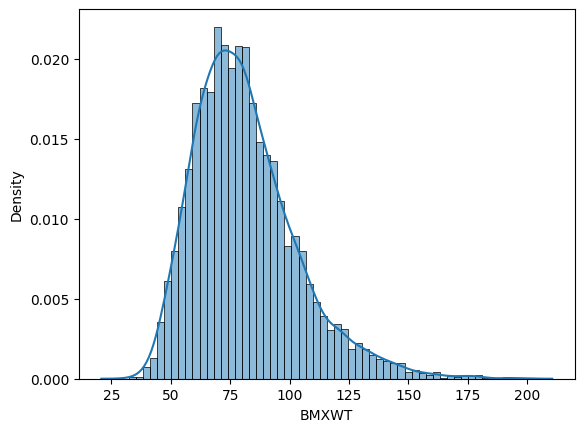

In [118]:
sns.histplot(data = da['BMXWT'].dropna(), 
             kde=True, 
             stat='density',
             kde_kws=dict(cut=3)
            );
